<a href="https://colab.research.google.com/github/brahma102/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Mobile Price Range Prediction**

In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

# **Data Description -**

* Battery_power - Total energy a battery can store in one time measured in mAh
* Blue - Has bluetooth or not
* Clock_speed - speed at which microprocessor executes instructions
* Dual_sim - Has dual sim support or not
* Fc - Front Camera mega pixels
* Four_g - Has 4G or not
* Int_memory - Internal Memory in Gigabytes
* M_dep - Mobile Depth in cm
* Mobile_wt - Weight of mobile phone
* N_cores - Number of cores of processor
* Pc - Primary Camera mega pixels
* Px_height - Pixel Resolution Height
* Px_width - Pixel Resolution Width
* Ram - Random Access Memory in Mega Bytes
* Sc_h - Screen Height of mobile in cm
* Sc_w - Screen Width of mobile in cm
* Talk_time - longest time that a single battery charge will last when you are
* Three_g - Has 3G or not
* Touch_screen - Has touch screen or not
* Wifi - Has wifi or not
* Price_range - This is the target variable with value of 0(low cost), 1(medium cost),
* 2(high cost) and 3(very high cost).





# **Importing Libraries**

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix , plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

# **Loading Data set**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path  = "/content/drive/MyDrive/Colab Notebooks/Capstone Project 3/data_mobile_price_range.csv"
data = pd.read_csv(path ,header= 0,encoding= 'unicode_escape')

In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [8]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [9]:
data['fc'].value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

In [10]:
# data['four_g'].value_counts()
data.groupby(['price_range','four_g']).count()

battery_power  blue  clock_speed  dual_sim   fc  \
price_range four_g                                                    
0           0                 241   241          241       241  241   
            1                 259   259          259       259  259   
1           0                 238   238          238       238  238   
            1                 262   262          262       262  262   
2           0                 253   253          253       253  253   
            1                 247   247          247       247  247   
3           0                 225   225          225       225  225   
            1                 275   275          275       275  275   

                    int_memory  m_dep  mobile_wt  n_cores   pc  px_height  \
price_range four_g                                                          
0           0              241    241        241      241  241        241   
            1              259    259        259      259  259        259   
1           0              238    238        238      238  238        238   
            1              262    262        262      262  262        262   
2           0              253    253        253      253  253        253   
            1              247    247        247      247  247        247   
3           0              225    225        225      225  225        225   
            1              275    275        275      275  275        275   

                    px_width  ram  sc_h  sc_w  talk_time  three_g  \
price_range four_g                                                  
0           0            241  241   241   241        241      241   
            1            259  259   259   259        259      259   
1           0            238  238   238   238        238      238   
            1            262  262   262   262        262      262   
2           0            253  253   253   253        253      253   
            1            247  247   247   247        247      247   
3           0            225  225   225   225        225      225   
            1            275  275   275   275        275      275   

                    touch_screen  wifi  
price_range four_g                      
0           0                241   241  
            1                259   259  
1           0                238   238  
            1                262   262  
2           0                253   253  
            1                247   247  
3           0                225   225  
            1                275   275

In [11]:
data['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

In [12]:
data['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

# **Explortory Data Analysis**

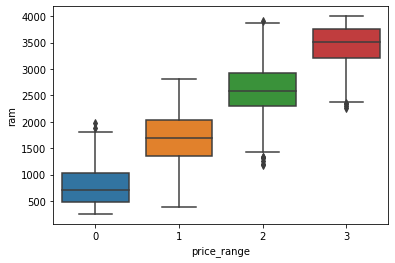

In [13]:
#Boxplot between ram and price_range
sns.boxplot(y = 'ram' , x = 'price_range',data= data)
plt.show()

In [14]:
column=data.columns
column.shape

(21,)

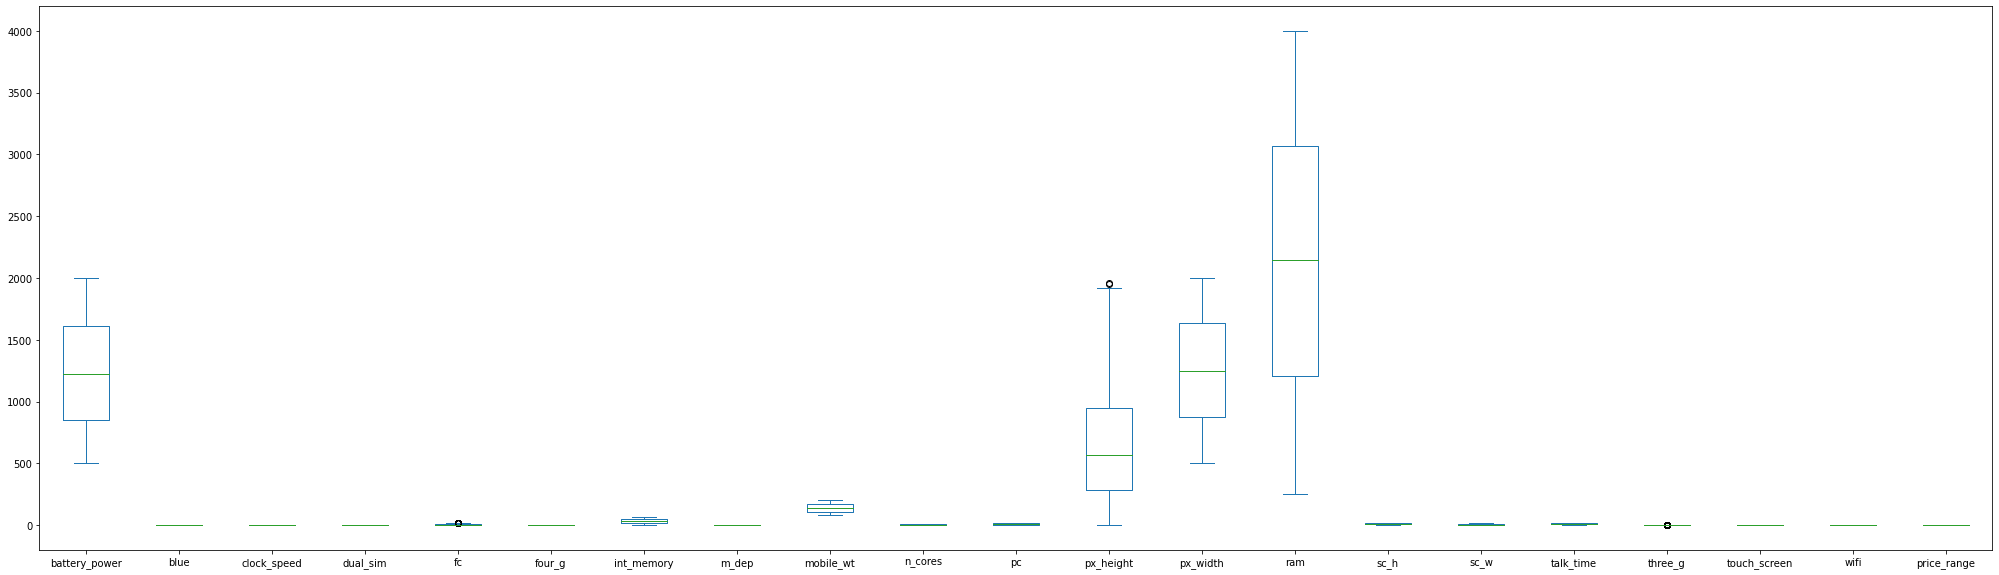

In [15]:
data.plot(kind='box',figsize=(35,10))
plt.show()

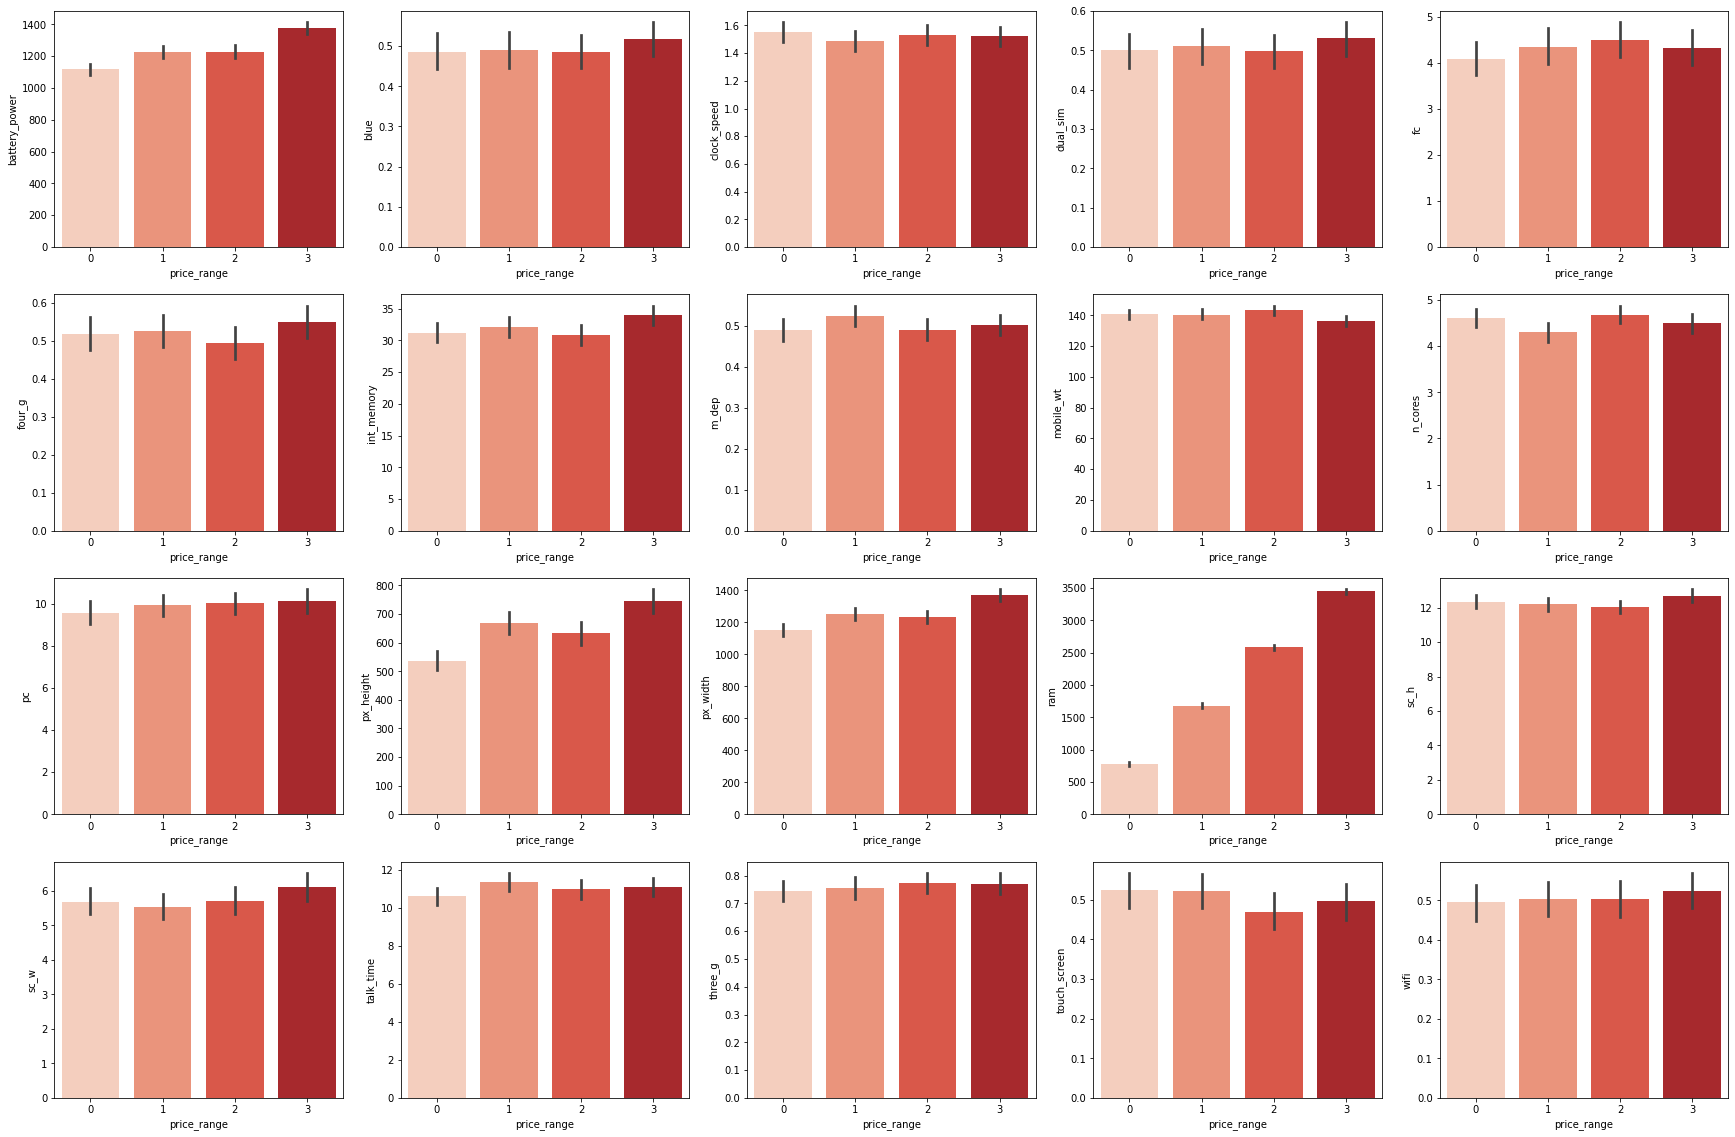

In [16]:
fig, axes = plt.subplots(4, 5, figsize=(30, 20))
k=0
for i in range(4):
  for j in range(5):
 
      sns.barplot(ax=axes[i, j],data=data,x='price_range',y=column[k],palette = 'Reds')
 
      k=k+1

. Here we see that Ram of phone and price are highly corelated.Incress in ram Incress in price.

. After that 4g_band and batry of phone also afect phone price.

. Mobile wt is decrese when price high, but mobile size is increase.

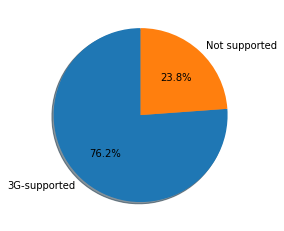

In [17]:
#percentage of phones which support 3g
labels = ["3G-supported",'Not supported']
values=data['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

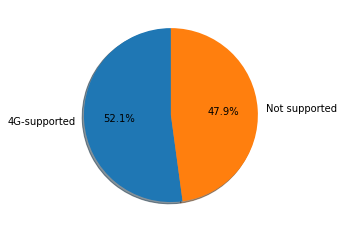

In [18]:
#percentage of phones which support 4g
labels = ["4G-supported",'Not supported']
values=data['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

## **Plotting Relation between Price Range & 3G/4G**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


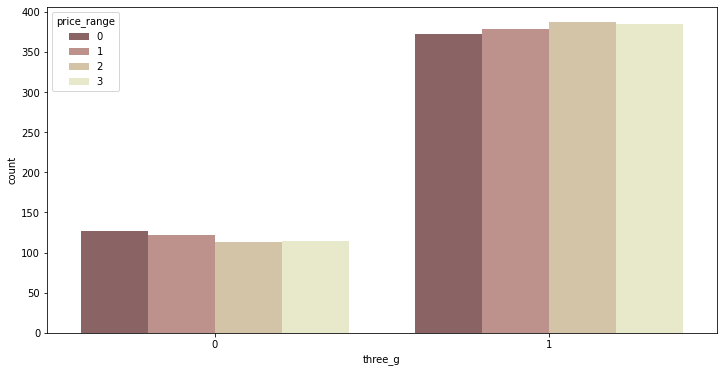

In [19]:
plt.figure(figsize = (12,6))
sns.countplot(data['three_g'] , hue = data['price_range'] , palette = 'pink')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


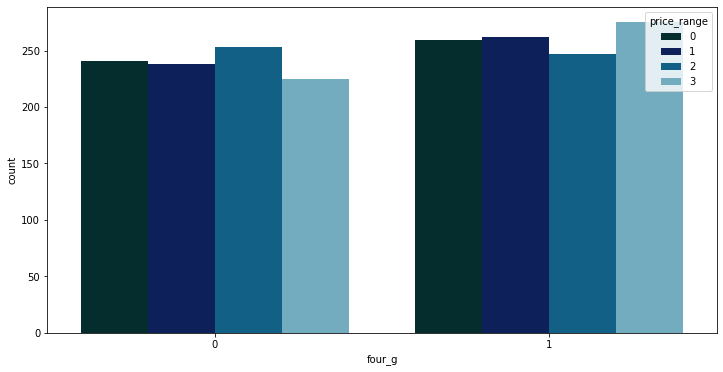

In [20]:
plt.figure(figsize = (12,6))
sns.countplot(data['four_g'] , hue = data['price_range'] , palette = 'ocean')
plt.show()

## **Plotting Relation between Price Range & Memory**

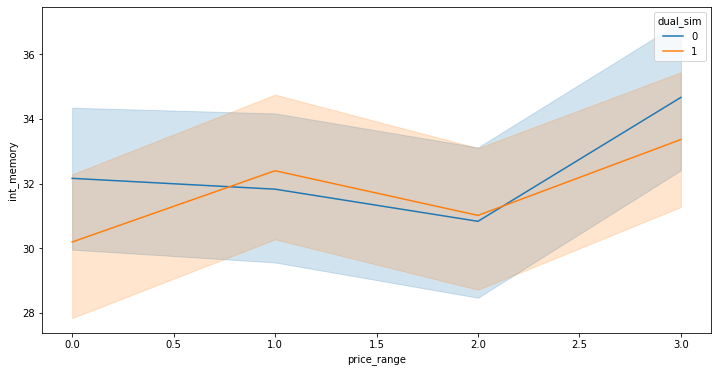

In [21]:
plt.figure(figsize = (12,6))
sns.lineplot(x = 'price_range' , y = 'int_memory' , data = data , hue = 'dual_sim')
plt.show()

There is increase in internal memory for very high prices.

# **Correlation**

In this section we will try to find relationship of each variables, their importance and impact on our dependent variable.

In [22]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [23]:
# Install plotly package to show output in png format so i show it in github
%%capture
!pip install kaleido
!pip install plotly>=4.0.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

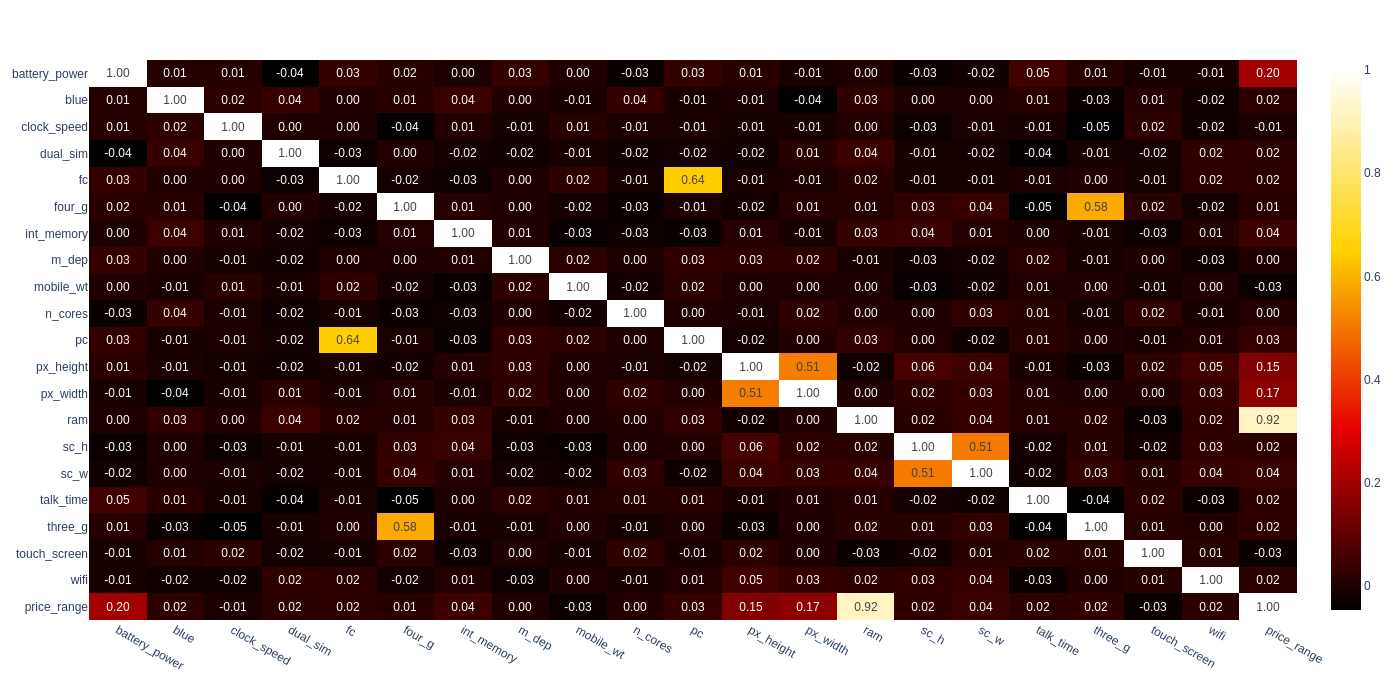

In [24]:
corr = data.corr()
import plotly.express as px
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale='hot', aspect="auto")
# fig.show() 
fig.show(renderer="png",width=1400, height=700)

Points to note from above heatmap:

pc is correlated with fc.

three_g and four_g are moderately correlated.

sc_h and sc_w are moderately correlated. We will change them into a single variable.

px_width and px_height are moderately correlated. We will try to change them into a single variable.

ram is highly correlated with our price range. May be one the most important factor in determining the price.

In [25]:
# data['mobile_size']=data['px_height']*data['px_width']
# data['screen_size']=data['sc_w']*data['sc_h']

We cannot create mobile screen_size=px_height * px_width because , there are may data whose height/ weidth is 0 .

if we mulitiplly it show 0 size which may afect our data.

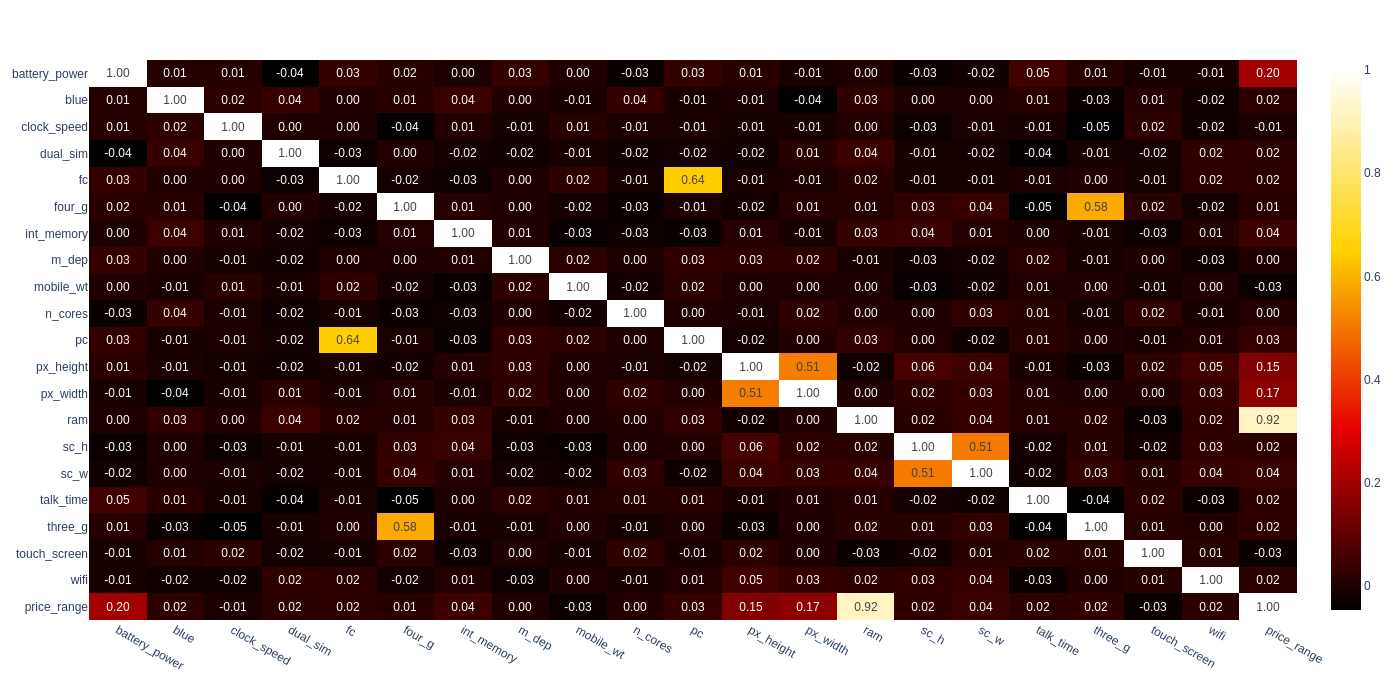

In [26]:
corr=data.corr()
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale='hot', aspect="auto")
# fig.show() 
fig.show(renderer="png",width=1400, height=700)

In [27]:
# data.drop(['px_height','px_width'],axis=1,inplace=True)

In [28]:
# corr=data.corr()
# fig = px.imshow(corr, text_auto=".2f", color_continuous_scale='hot', aspect="auto")
# fig.show()

**Observations from the summary plot are:**

*   The most important features in determining the predictions are ram, battery power, px_height.
*   Higher values of ram are increasing the predicted class.
*   Higher values of battery power are increasing the predicted class.
*   Higher values of px_height and px_weight are increasing the predicted class.



# **Handling Outliers**

In [29]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [30]:
# find Numerical variables
numerical = [var for var in data.columns if data[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 21 numerical variables


In [31]:
# Here we taken if no of variable in a colum is graterthan 20 we take as continious otherwise we take it as discrite ..It help to calulate outlayers
discrete = []
for var in numerical:
    if len(data[var].unique())<20:
        print(var, ' values: ', data[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

blue  values:  [0 1]
dual_sim  values:  [0 1]
four_g  values:  [0 1]
m_dep  values:  [0.6 0.7 0.9 0.8 0.1 0.5 1.  0.3 0.4 0.2]
n_cores  values:  [2 3 5 6 1 8 4 7]
sc_h  values:  [ 9 17 11 16  8 13 19  5 14 18  7 10 12  6 15]
sc_w  values:  [ 7  3  2  8  1 10  9  0 15 13  5 11  4 12  6 17 14 16 18]
talk_time  values:  [19  7  9 11 15 10 18  5 20 12 13  2  4  3 16  6 14 17  8]
three_g  values:  [0 1]
touch_screen  values:  [0 1]
wifi  values:  [1 0]
price_range  values:  [1 2 3 0]
There are 12 discrete variables


In [32]:
continuous = [var for var in numerical if var not in discrete and var not in ['price_range']]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



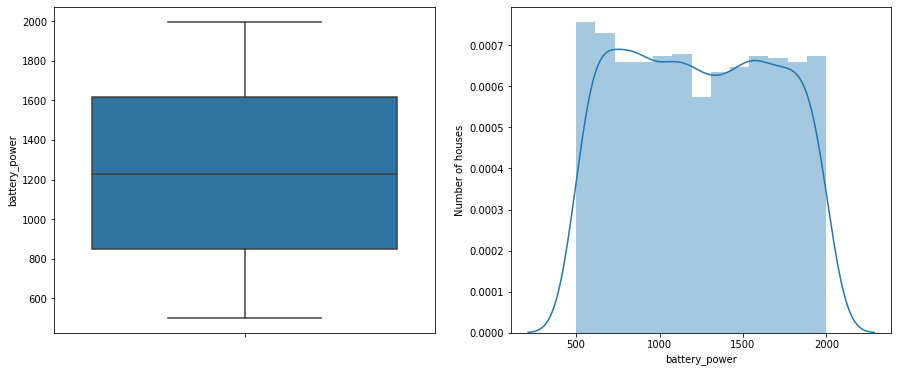

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



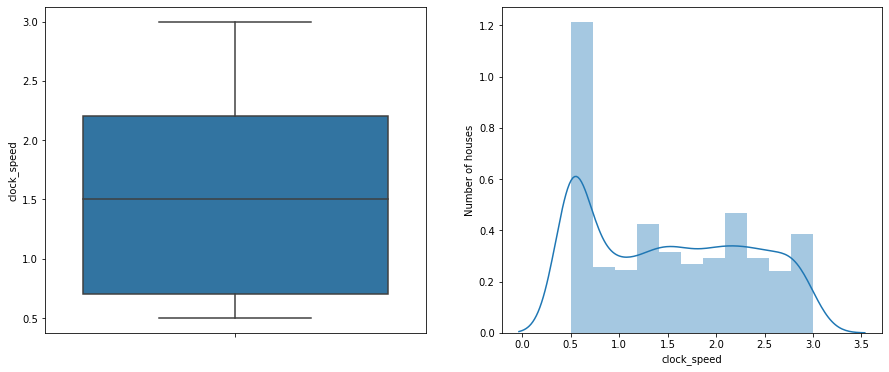

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



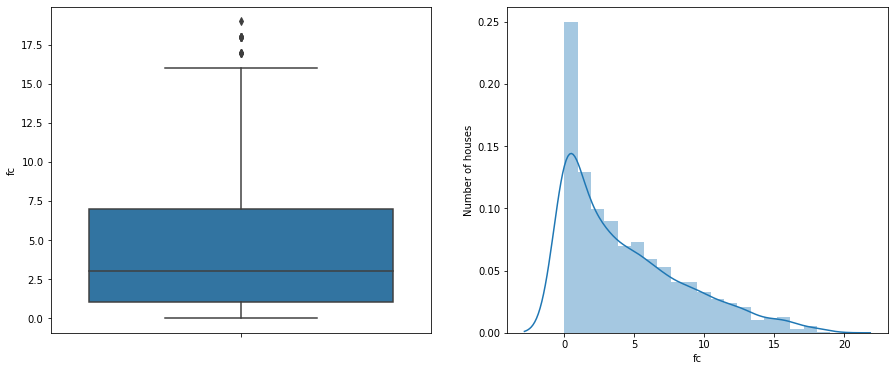

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



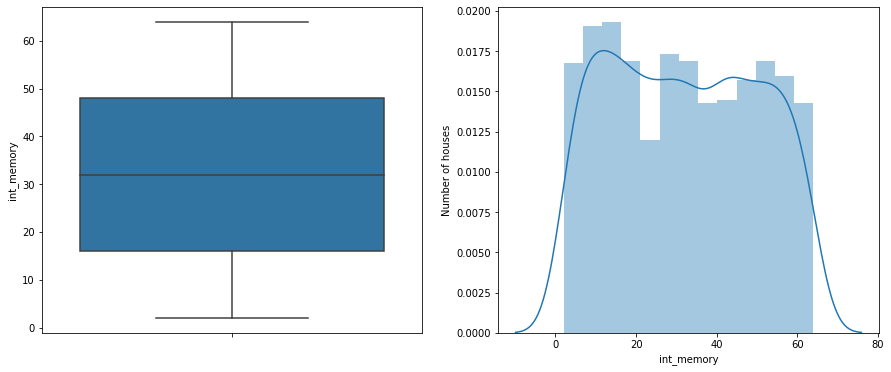

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



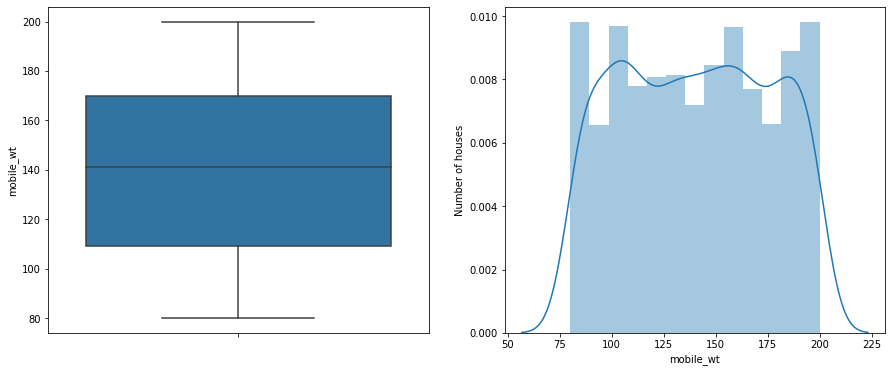

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



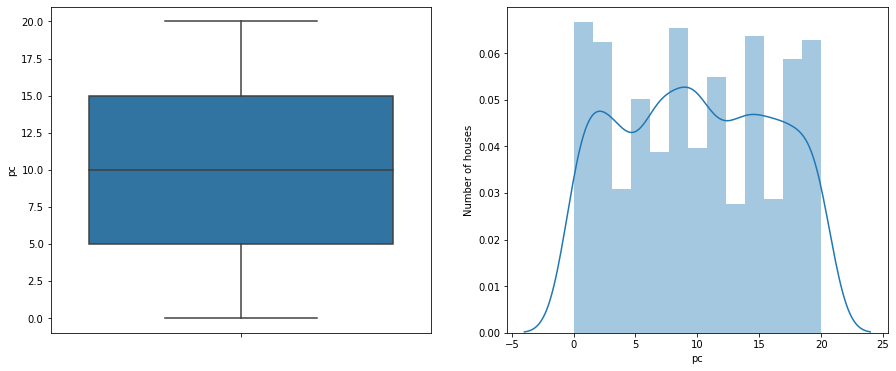

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



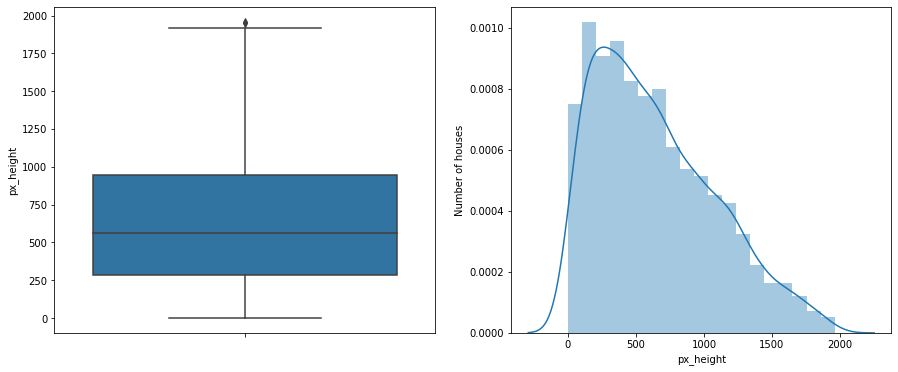

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



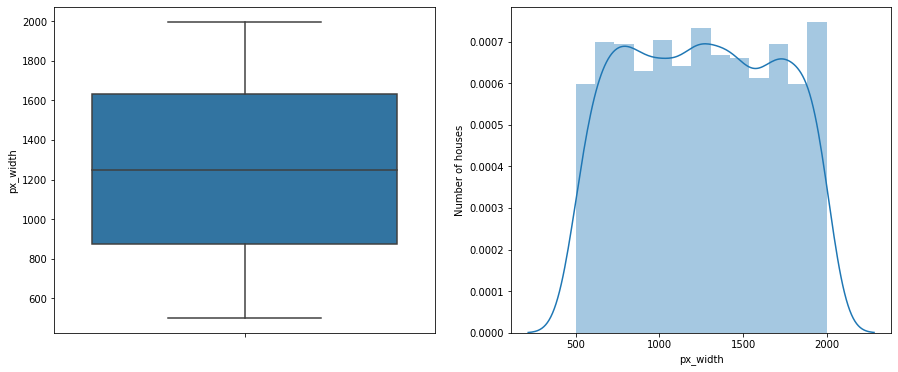

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



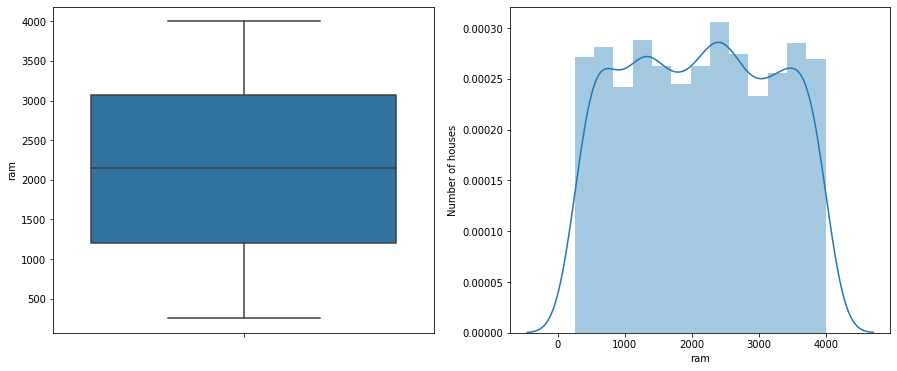

In [33]:
for var in continuous:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=data[var])
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(data[var].dropna())
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()

Here we se in most of the case outlayers are not present .

# **Splitting the data**

In [34]:
#independent variables
X = data.drop('price_range',axis=1)

In [35]:
#dependent variable
y = data['price_range']

In [36]:
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [37]:
print(X_train.shape)
print(X_test.shape)

(1400, 20)
(600, 20)


In [38]:
q=X_train[X_train['sc_w']==0]
pd.get_option("display.max_columns")

20

In [39]:
# settings to display all columns
pd.set_option("display.max_columns", None)
# display the dataframe head

In [40]:
q.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

# **Scalling the dataset**

In [41]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [42]:
# X_train[1]

# **Fitting Models**

*  In this section we are going to implement various machine learning algorithms to make our predictions. Some of the algorithms we will be using are: Random Forest Classifier, XGBoost Classifier.

*  The detailed step we will be following are as follows:

1. Initial fitting of the model.

2. Evaluating the performance of the model using metrics.

3. Hyperparameter tuning to improve model performance and to reduce if overfitting occurs.

# **K NeighborsClassifier**

In [43]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

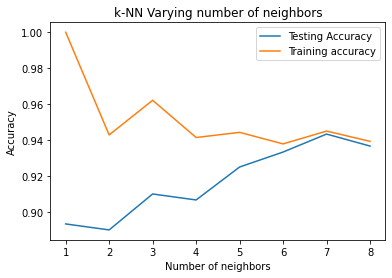

In [44]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [45]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [46]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [47]:
#calculating metrics
knn_test_score = knn.score(X_test,y_test)
knn_test_score

0.9433333333333334

In [48]:
knn_train_score = knn.score(X_train,y_train)
knn_train_score

0.945

In [49]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,roc_curve

In [50]:
# Let us get the predictions using the classifier we had fit above
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

In [51]:
matrix = confusion_matrix(y_test,y_test_pred)
matrix

array([[150,   1,   0,   0],
       [  5, 126,   4,   0],
       [  0,   7, 136,   8],
       [  0,   0,   9, 154]])

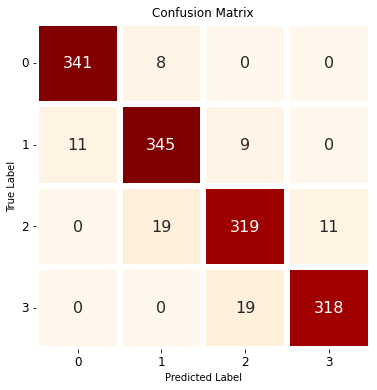

In [52]:
#plotting confusion matrix for train set
cm = confusion_matrix(y_train, y_train_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

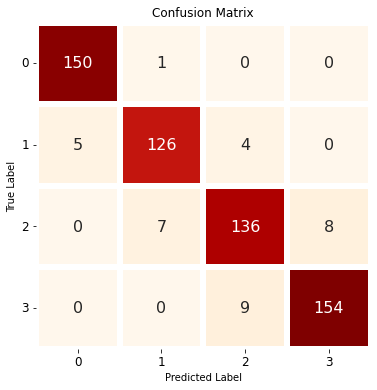

In [53]:
#plotting confusion matrix for test set
cm = confusion_matrix(y_test, y_test_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [54]:
#predicting 
y_pred_proba = knn.predict_proba(X_test)

In [55]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

0.9910018426810817

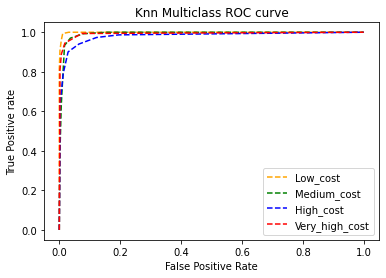

In [56]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title('Knn Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [57]:
#printing classification report for train data
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       349
           1       0.93      0.95      0.94       365
           2       0.92      0.91      0.92       349
           3       0.97      0.94      0.95       337

    accuracy                           0.94      1400
   macro avg       0.95      0.94      0.95      1400
weighted avg       0.95      0.94      0.95      1400



In [58]:
#printing classification report for test data
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       151
           1       0.94      0.93      0.94       135
           2       0.91      0.90      0.91       151
           3       0.95      0.94      0.95       163

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [59]:
# test knn
print("Model Score:",knn.score(X_test,y_test))

MSE= mean_squared_error(y_test,y_test_pred)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test,y_test_pred)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test,y_test_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9433333333333334
MSE : 0.056666666666666664
RMSE : 0.23804761428476165
R2 : 0.9562348216354446
Adjusted R2 : 0.9547230710874461


# **Random Forest**

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
# Create an instance of the RandomForestClassifier
rf_model = RandomForestClassifier()
param_dict={'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='accuracy')

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.2s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             scoring='accuracy', verbose=2)

In [62]:
rf_optimal_model = rf_grid.best_estimator_
rf_optimal_model

RandomForestClassifier(max_depth=8, min_samples_leaf=50, min_samples_split=100)

In [63]:
# Making predictions on train and test data

train_class_preds = rf_optimal_model.predict(X_train)
test_class_preds = rf_optimal_model.predict(X_test)

In [64]:
train_class_preds
test_class_preds

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 2,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 1, 0, 3, 3, 1, 3, 2, 2, 2,
       3, 3, 1, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 3, 3, 0, 0, 0, 2, 0,
       1, 3, 1, 3, 2, 1, 0, 2, 3, 3, 0, 3, 1, 2, 2, 1, 3, 1, 2, 3, 2, 3,
       3, 0, 0, 2, 3, 3, 0, 0, 0, 0, 1, 3, 1, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 1, 0, 1, 1, 2, 2, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 3, 1, 0, 3, 2, 2, 3, 3, 0,
       1, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 2, 3, 1, 1, 0, 3, 3, 0, 1, 2,
       1, 0, 3, 3, 3, 1, 1, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 3, 2, 3, 2, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 2, 3, 2, 2, 2, 1, 0, 2, 1, 1, 1, 0,
       3, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,train_class_preds)
test_accuracy = accuracy_score(y_test,test_class_preds)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.8642857142857143
The accuracy on test dataset is 0.8216666666666667


In [67]:
# Get the confusion matrices for train and test
train_cm = confusion_matrix(y_train,train_class_preds)
test_cm = confusion_matrix(y_test,test_class_preds )

In [68]:
train_cm

array([[338,  11,   0,   0],
       [ 32, 296,  37,   0],
       [  0,  72, 252,  25],
       [  0,   0,  13, 324]])

In [69]:
test_cm

array([[146,   5,   0,   0],
       [ 15, 100,  20,   0],
       [  0,  34,  95,  22],
       [  0,   0,  11, 152]])

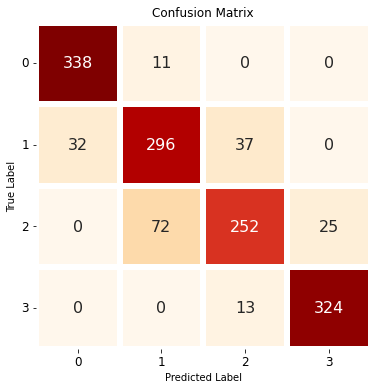

In [70]:
cm = confusion_matrix(y_train,train_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

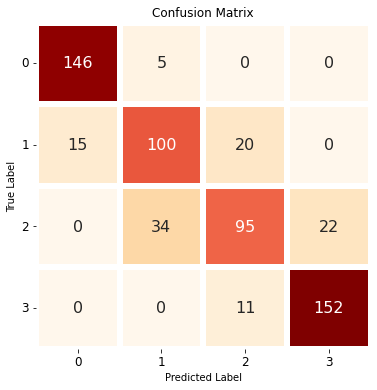

In [71]:
cm = confusion_matrix(y_test, test_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [72]:
print(classification_report(y_train,train_class_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       349
           1       0.78      0.81      0.80       365
           2       0.83      0.72      0.77       349
           3       0.93      0.96      0.94       337

    accuracy                           0.86      1400
   macro avg       0.86      0.87      0.86      1400
weighted avg       0.86      0.86      0.86      1400



In [73]:
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       151
           1       0.72      0.74      0.73       135
           2       0.75      0.63      0.69       151
           3       0.87      0.93      0.90       163

    accuracy                           0.82       600
   macro avg       0.81      0.82      0.81       600
weighted avg       0.82      0.82      0.82       600



In [74]:
# test random forest
print("Model Score:",rf_optimal_model.score(X_test,y_test))

MSE= mean_squared_error(y_test,test_class_preds)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test,test_class_preds)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, test_class_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8216666666666667
MSE : 0.17833333333333334
RMSE : 0.4222953153106643
R2 : 0.8622684092644876
Adjusted R2 : 0.8575108413634336


# **GradientBoostingClassifier**

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
state = 12  
test_size = 0.33
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,  
    test_size=test_size, random_state=state)

In [77]:
gbd_model=GradientBoostingClassifier()
parameters = {'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
                  # 'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [20],
                  'max_depth'    : [2,4,6,10]
                 }
gb_classifier=GridSearchCV(gbd_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=5,verbose=3)
gb_classifier.fit(X_train,y_train)
# (n_estimators=20,param_grid=parameters,random_state=0)
# gb_clf2.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END learning_rate=0.05, max_depth=2, n_estimators=20;, score=-0.213 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=2, n_estimators=20;, score=-0.234 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=2, n_estimators=20;, score=-0.250 total time=   0.2s
[CV 4/5] END learning_rate=0.05, max_depth=2, n_estimators=20;, score=-0.241 total time=   0.2s
[CV 5/5] END learning_rate=0.05, max_depth=2, n_estimators=20;, score=-0.219 total time=   0.2s
[CV 1/5] END learning_rate=0.05, max_depth=4, n_estimators=20;, score=-0.176 total time=   0.3s
[CV 2/5] END learning_rate=0.05, max_depth=4, n_estimators=20;, score=-0.181 total time=   0.3s
[CV 3/5] END learning_rate=0.05, max_depth=4, n_estimators=20;, score=-0.191 total time=   0.3s
[CV 4/5] END learning_rate=0.05, max_depth=4, n_estimators=20;, score=-0.176 total time=   0.3s
[CV 5/5] END learning_rate=0.05, max_depth=4, n_estimators=20;, score=-0.1

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75,
                                           1],
                         'max_depth': [2, 4, 6, 10], 'n_estimators': [20]},
             scoring='neg_mean_squared_error', verbose=3)

In [78]:
gb_optimal_model = gb_classifier.best_estimator_
gb_optimal_model

GradientBoostingClassifier(learning_rate=0.75, max_depth=2, n_estimators=20)

In [79]:
# Making predictions on train and test data

train_class_preds = gb_optimal_model.predict(X_train)
test_class_preds = gb_optimal_model.predict(X_test)

In [80]:
train_class_preds
test_class_preds
print("Accuracy score (training): {0:.3f}".format(gb_optimal_model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(gb_optimal_model.score(X_val, y_val)))

Accuracy score (training): 0.998
Accuracy score (validation): 0.874


We're mainly interested in the classifier's accuracy on the validation set, but it looks like a learning rate of 0.75 gives us the best performance on the validation set and good performance on the training set.

Now we can evaluate the classifier by checking its accuracy and creating a confusion matrix. Let's create a new classifier and specify the best learning rate we discovered.

In [81]:
# gb_optimal_model.fit(X_train, y_train)
predictions = gb_optimal_model.predict(X_val)


print("Confusion Matrix:")
print(confusion_matrix(y_val, predictions))

print("Classification Report")
print(classification_report(y_val, predictions))

Confusion Matrix:
[[ 99  11   0   0]
 [ 10 108   7   0]
 [  0  12  95   7]
 [  0   0  11 102]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       110
           1       0.82      0.86      0.84       125
           2       0.84      0.83      0.84       114
           3       0.94      0.90      0.92       113

    accuracy                           0.87       462
   macro avg       0.88      0.87      0.88       462
weighted avg       0.88      0.87      0.87       462



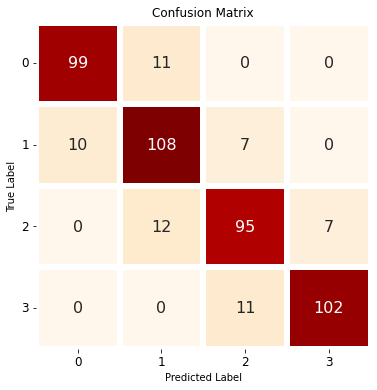

In [82]:
#plotting the confusion matrix for train set
cm = confusion_matrix(y_val, predictions)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [83]:
test_pred = gb_optimal_model.predict(X_val)


print("Confusion Matrix:")
print(confusion_matrix(y_val, test_pred))

print("Classification Report")
print(classification_report(y_val, test_pred))

Confusion Matrix:
[[ 99  11   0   0]
 [ 10 108   7   0]
 [  0  12  95   7]
 [  0   0  11 102]]
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       110
           1       0.82      0.86      0.84       125
           2       0.84      0.83      0.84       114
           3       0.94      0.90      0.92       113

    accuracy                           0.87       462
   macro avg       0.88      0.87      0.88       462
weighted avg       0.88      0.87      0.87       462



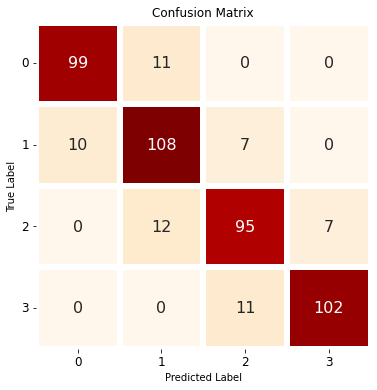

In [84]:
#plotting the confusion matrix for test set
cm = confusion_matrix(y_val, test_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

# **XGBClassifier**

In [85]:
from xgboost import XGBClassifier
xg_model =XGBClassifier()
parameters = {
    'max_depth':  (4,6,8,10),
    # 'n_estimators': (100,200,500,1000,1500),
    'learning_rate': [0.1, 0.01, 0.05,0.09]
}
xg_classifier=GridSearchCV(xg_model,param_grid=parameters,cv=5,verbose=3)
xg_classifier.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....learning_rate=0.1, max_depth=4;, score=0.904 total time=   0.5s
[CV 2/5] END ....learning_rate=0.1, max_depth=4;, score=0.883 total time=   0.4s
[CV 3/5] END ....learning_rate=0.1, max_depth=4;, score=0.872 total time=   0.4s
[CV 4/5] END ....learning_rate=0.1, max_depth=4;, score=0.856 total time=   0.4s
[CV 5/5] END ....learning_rate=0.1, max_depth=4;, score=0.909 total time=   0.4s
[CV 1/5] END ....learning_rate=0.1, max_depth=6;, score=0.888 total time=   1.3s
[CV 2/5] END ....learning_rate=0.1, max_depth=6;, score=0.867 total time=   0.5s
[CV 3/5] END ....learning_rate=0.1, max_depth=6;, score=0.862 total time=   0.5s
[CV 4/5] END ....learning_rate=0.1, max_depth=6;, score=0.861 total time=   0.5s
[CV 5/5] END ....learning_rate=0.1, max_depth=6;, score=0.898 total time=   0.5s
[CV 1/5] END ....learning_rate=0.1, max_depth=8;, score=0.878 total time=   0.6s
[CV 2/5] END ....learning_rate=0.1, max_depth=8;

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.05, 0.09],
                         'max_depth': (4, 6, 8, 10)},
             verbose=3)

In [86]:
xg_model = xg_classifier.best_estimator_
xg_model

XGBClassifier(learning_rate=0.09, max_depth=4, objective='multi:softprob')

In [87]:
test_class_preds

array([3, 0, 2, 1, 2, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 1, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 2, 1, 1, 3, 0, 3, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 3, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 2, 1, 3, 3, 3, 0, 0, 0, 2, 0,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 2, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 3, 1, 2, 0, 3, 3, 1, 1, 1, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 3, 1, 1, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 3, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 1, 0, 3,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 2, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 3, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [88]:
# Making predictions on train and test data

train_class_preds = xg_classifier.predict(X_train)
test_class_preds = xg_classifier.predict(X_test)

In [89]:
test_class_preds

array([3, 0, 2, 1, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 2, 1, 1, 3, 0, 3, 0, 2, 2, 1, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 0,
       2, 3, 1, 2, 2, 0, 0, 3, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 2, 3, 0, 1, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 1, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 3, 1, 0, 3, 2, 2, 3, 3, 0,
       2, 2, 3, 0, 3, 1, 0, 1, 3, 1, 2, 0, 3, 3, 1, 1, 1, 2, 3, 0, 1, 3,
       2, 0, 3, 3, 3, 1, 1, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 3, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 1, 3, 2, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 1,

In [90]:
#predicting 
y_test_pred_proba = xg_classifier.predict_proba(X_test)
y_train_pred_proba = xg_classifier.predict_proba(X_train)

y_pred_proba
#R

array([[0.        , 0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       ...,
       [1.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.71428571, 0.28571429],
       [0.        , 0.        , 0.85714286, 0.14285714]])

In [91]:
#Xg boost  after training for train

print("Model Score:",xg_classifier.score(X_train,y_train))
MSE= mean_squared_error(y_train,train_class_preds)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_train), (train_class_preds))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_train), (train_class_preds)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)) )
print('Roc_auc_score:',roc_auc_score((y_train),y_train_pred_proba, multi_class='ovo', average='weighted'))

Model Score: 1.0
MSE : 0.0
RMSE : 0.0
R2 : 1.0
Adjusted R2 : 1.0
Roc_auc_score: 1.0


In [92]:
#Xg boost  after training for test

print("Model Score:",xg_classifier.score(X_test,y_test))
MSE= mean_squared_error(y_test,test_class_preds)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (test_class_preds))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (test_class_preds)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print('Roc_auc_score:',roc_auc_score((y_test),y_test_pred_proba, multi_class='ovo', average='weighted'))

Model Score: 0.9016666666666666
MSE : 0.09833333333333333
RMSE : 0.31358146203711296
R2 : 0.9240545434262127
Adjusted R2 : 0.9214312115929213
Roc_auc_score: 0.9880612465325376


In [93]:
# Confusiton matrix for train and test data
cm_train_xg=confusion_matrix(y_train,train_class_preds)
cm_test_xg=confusion_matrix(y_test,test_class_preds)

print( 'Confusion matrix for training set\n',cm_train_xg)
print( 'Confusion matrix for testing set \n',cm_test_xg)

Confusion matrix for training set
 [[239   0   0   0]
 [  0 240   0   0]
 [  0   0 235   0]
 [  0   0   0 224]]
Confusion matrix for testing set 
 [[143   8   0   0]
 [  8 120   7   0]
 [  0  11 125  15]
 [  0   0  10 153]]


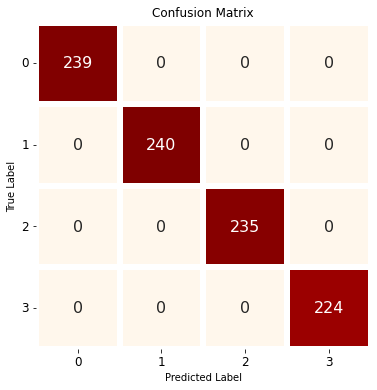

In [94]:
# train data
labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_train,train_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

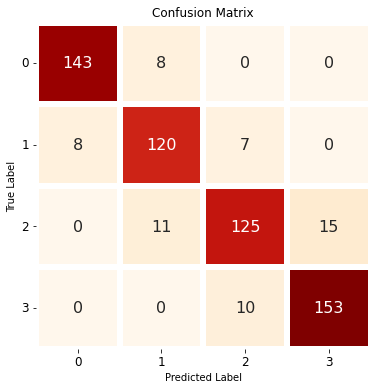

In [95]:
# train data
labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_test,test_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [96]:
print(classification_report(y_train,train_class_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       1.00      1.00      1.00       240
           2       1.00      1.00      1.00       235
           3       1.00      1.00      1.00       224

    accuracy                           1.00       938
   macro avg       1.00      1.00      1.00       938
weighted avg       1.00      1.00      1.00       938



In [97]:
# Here, we find the classification report
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       151
           1       0.86      0.89      0.88       135
           2       0.88      0.83      0.85       151
           3       0.91      0.94      0.92       163

    accuracy                           0.90       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.90      0.90      0.90       600



# **Logistic Regression**

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
logistic_model = LogisticRegression(fit_intercept=True, max_iter=10000)
logistic_model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=10000)

In [100]:
# Get the predicted probabilities
train_preds_proba = logistic_model.predict_proba(X_train)
test_preds_proba = logistic_model.predict_proba(X_test)

In [101]:
# Get the predicted classes
train_class_pred = logistic_model.predict(X_train)
test_class_pred = logistic_model.predict(X_test)

In [102]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_pred,y_train)
test_accuracy = accuracy_score(test_class_pred,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7921108742004265
The accuracy on test data is  0.7416666666666667


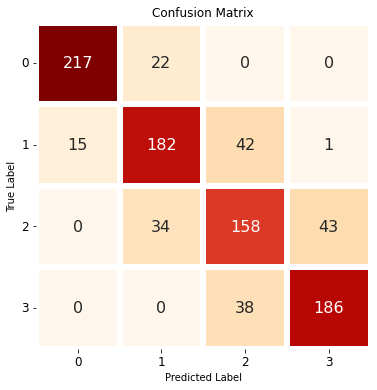

In [103]:
# Get the confusion matrix for both train and test

labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_train, train_class_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

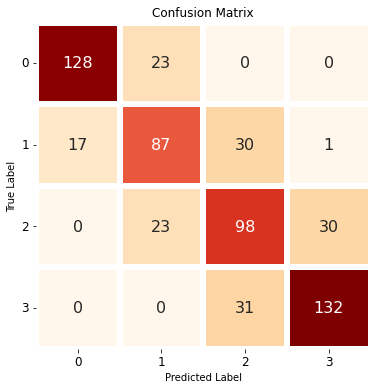

In [104]:
cm = confusion_matrix(y_test, test_class_pred)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [105]:
#predicting 
y_pred_proba = logistic_model.predict_proba(X_test)

In [106]:
roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

0.9368027607278365

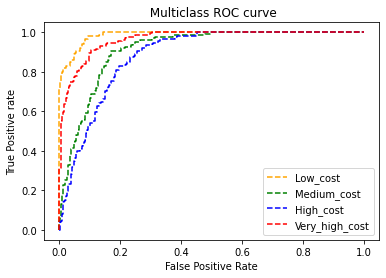

In [107]:
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_preds_proba[:,i], pos_label=i)
    
# plotting multiclass ROC curve   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Low_cost')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Medium_cost')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='High_cost')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label='Very_high_cost')
plt.title(' Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);

In [108]:
print(classification_report(y_train,train_class_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       239
           1       0.76      0.76      0.76       240
           2       0.66      0.67      0.67       235
           3       0.81      0.83      0.82       224

    accuracy                           0.79       938
   macro avg       0.79      0.79      0.79       938
weighted avg       0.79      0.79      0.79       938



In [109]:
print(classification_report(y_test,test_class_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       151
           1       0.65      0.64      0.65       135
           2       0.62      0.65      0.63       151
           3       0.81      0.81      0.81       163

    accuracy                           0.74       600
   macro avg       0.74      0.74      0.74       600
weighted avg       0.74      0.74      0.74       600



# **Decision Tree Classifier**

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
decision_tree = DecisionTreeClassifier(random_state=0)

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [112]:
reg_decision_model=DecisionTreeClassifier()
parameters={"splitter":["best","random"],
            "max_depth" : [7,8,9,10],
          #  "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
          #  "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)
tuning_model.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=best;, score=-1.735 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=best;, score=-0.987 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=best;, score=-2.099 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=random;, score=-1.460 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=random;, score=-1.083 total time=   0.0s
[CV 3/3] END max_depth=7, max_features=auto, max_leaf_nodes=None, splitter=random;, score=-2.010 total time=   0.0s
[CV 1/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, splitter=best;, score=-0.642 total time=   0.0s
[CV 2/3] END max_depth=7, max_features=auto, max_leaf_nodes=10, splitter=best;, score=-1.559 total time=   0.0s
[CV 3/3] END max_depth=

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [113]:
dtree_optimal_model = tuning_model.best_estimator_
dtree_optimal_model

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=90)

In [114]:
# Making predictions on train and test data

train_class_preds = dtree_optimal_model.predict(X_train)
test_class_preds = dtree_optimal_model.predict(X_test)

In [115]:
train_class_preds
test_class_preds
print("Accuracy score (training): {0:.3f}".format(dtree_optimal_model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(dtree_optimal_model.score(X_test, y_test)))

Accuracy score (training): 0.994
Accuracy score (validation): 0.813


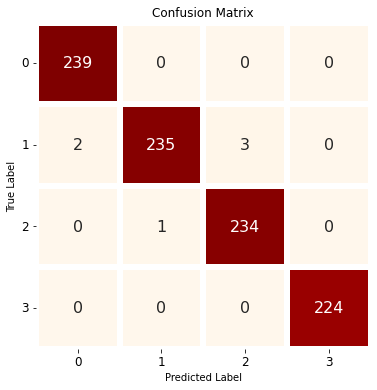

In [116]:
# Get the confusion matrix for both train and test

labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_train, train_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

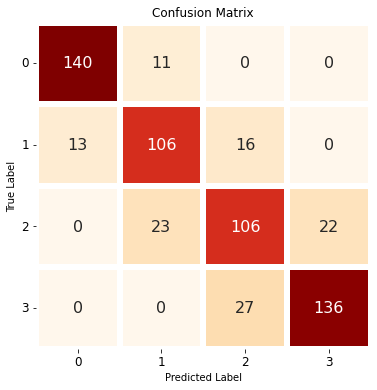

In [117]:
# Get the confusion matrix for both train and test

labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_test,test_class_preds)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [118]:
print(classification_report(y_train,train_class_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       239
           1       1.00      0.98      0.99       240
           2       0.99      1.00      0.99       235
           3       1.00      1.00      1.00       224

    accuracy                           0.99       938
   macro avg       0.99      0.99      0.99       938
weighted avg       0.99      0.99      0.99       938



In [119]:
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       151
           1       0.76      0.79      0.77       135
           2       0.71      0.70      0.71       151
           3       0.86      0.83      0.85       163

    accuracy                           0.81       600
   macro avg       0.81      0.81      0.81       600
weighted avg       0.81      0.81      0.81       600



# **Support Vector Machine(svc)**

In [120]:
# Applying the Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [121]:
# Predictions on the train and test data
y_test_svc=svc.predict(X_test)
y_train_svc=svc.predict(X_train)

In [122]:
# Confusiton matrix for train and test data
cm_train_svc=confusion_matrix(y_train,y_train_svc)
cm_test_svc=confusion_matrix(y_test,y_test_svc)

print( 'Confusion matrix for training set\n',cm_train_svc)
print( 'Confusion matrix for testing set \n',cm_test_svc)

Confusion matrix for training set
 [[234   5   0   0]
 [ 11 226   3   0]
 [  0  16 211   8]
 [  0   0   7 217]]
Confusion matrix for testing set 
 [[150   1   0   0]
 [  8 125   2   0]
 [  0   9 132  10]
 [  0   0   3 160]]


In [123]:
# Accuracy score
train_accu3=accuracy_score(y_train,y_train_svc)
test_accu3=accuracy_score(y_test,y_test_svc)
print('Train Set Accuracy:',train_accu3)
print('Test Set Accuracy:',test_accu3)

Train Set Accuracy: 0.9466950959488273
Test Set Accuracy: 0.945


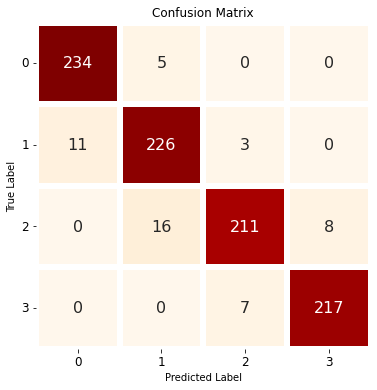

In [124]:
# train data
labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_train,y_train_svc)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

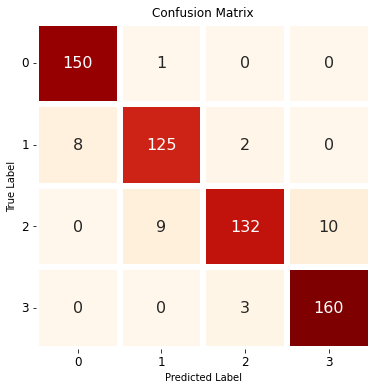

In [125]:
# train data
labels = ['0', '1' , '2', '3']
cm = confusion_matrix(y_test,y_test_svc)

df1 = pd.DataFrame(columns=["0","1","2","3"], index= ["0","1","2","3"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="OrRd", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

In [126]:
print(classification_report(y_train,y_train_svc))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       239
           1       0.91      0.94      0.93       240
           2       0.95      0.90      0.93       235
           3       0.96      0.97      0.97       224

    accuracy                           0.95       938
   macro avg       0.95      0.95      0.95       938
weighted avg       0.95      0.95      0.95       938



In [127]:
# Here, we find the classification report
print(classification_report(y_test,y_test_svc))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       151
           1       0.93      0.93      0.93       135
           2       0.96      0.87      0.92       151
           3       0.94      0.98      0.96       163

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.95      0.94      0.94       600



# **Conclusion**

*   Ram , Battery_power features were found to be the most relevant features for predicting price range of mobiles and dropping negative correlation features which are clock speed , mobile_wt , touch_screen
*   Knn gives acc score of 95% and Xg boost 91%.
*  Xgboost and KNN both are given best roc_auc_accuracy score of 99%
*  In case of Xgboost hyper parameter(using grid_search cv ) gives very good result.
*  Logistic regression is giving the less results among all the algorithms
*  So we conclude that kneighbors classifier is giving the best results for these dataset.
*  So we can say that in the price range prediction as the ram and battery_power increases the price range will increase for sure .
